500
dict_keys(['loss_before', 'kl_before', 'loss_after', 'kl_after', 'tasks', 'num_iterations', 'train_returns', 'valid_returns'])
-108.80705
-76.400375
10000
10000
10000
10000
['tasks', 'train_returns', 'valid_returns']
200
200
[-36.54982  -37.168556 -37.072617 -36.005817 -36.376156 -37.782665
 -36.46421  -36.91031  -36.899193 -37.370712 -36.56925  -36.705006
 -37.45115  -36.71786  -36.3285   -37.043076 -38.163742 -37.457493
 -37.14076  -36.65258 ]
[ -1.0202068   -4.8591886  -11.2014675  -11.023792   -11.247185
  -2.6907113   -4.5212746  -12.042791   -10.785078    -4.5764074
 -11.428238   -11.05672     -0.34164864  -6.9050436   -2.506454
  -5.5055594  -11.774888    -6.2333446  -11.000638   -11.243661  ]
[-36.54982  -37.168556 -37.072617 -36.005817 -36.376156 -37.782665
 -36.46421  -36.91031  -36.899193 -37.370712 -36.56925  -36.705006
 -37.45115  -36.71786  -36.3285   -37.043076 -38.163742 -37.457493
 -37.14076  -36.65258 ]
[-40.4664   -40.389797 -40.34336  -41.07283  -40.67827  -39.6

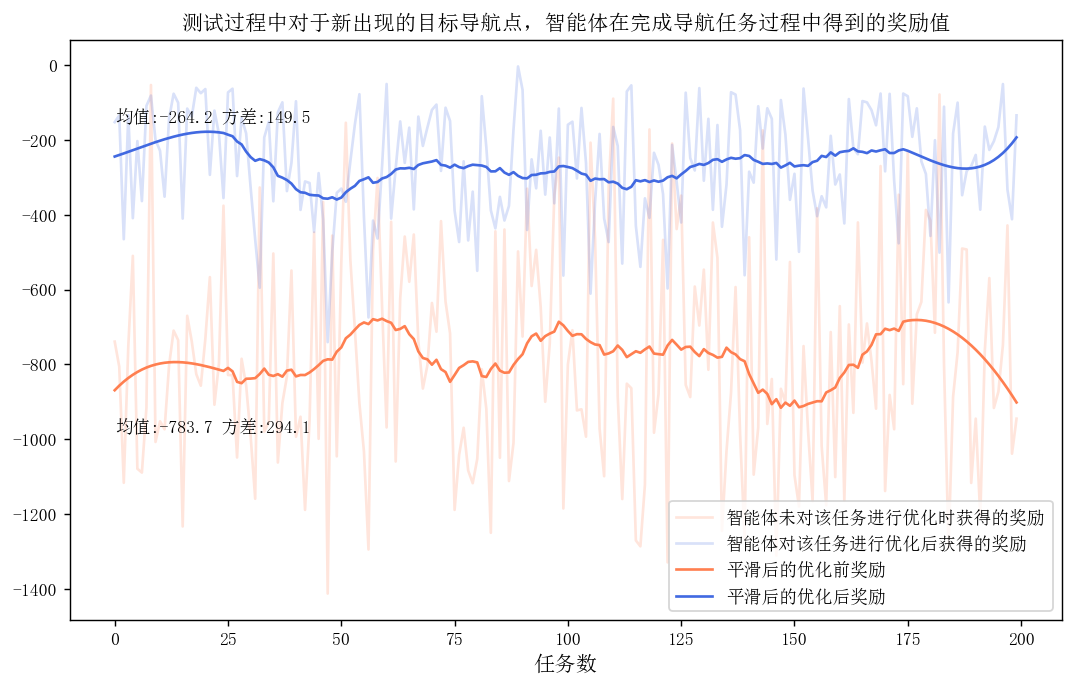

In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.signal as signal
import pickle

plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


file = 'history.pkl'

with open(file, 'rb')as f:
    hist = pickle.load(f)
    
# print (hist.keys())

batch_num = len(hist.keys())
print (batch_num)
print (hist[0].keys())
print (np.mean(hist[2]['train_returns'][0]))
print ('===================')
print (np.mean(hist[2]['valid_returns'][0]))

def smooth(data):
    # tmp = scipy.signal.savgol_filter(data, 53, 3)
    tmp = signal.savgol_filter(data, 49, 3)
    return tmp

loss_before = []
loss_after = []
train_returns = []
valid_returns = []

for i in range(batch_num):
    batch_data = hist[i]
    tr_returns = [np.sum(task) for task in batch_data['train_returns']]
    train_returns.extend(tr_returns)
    
    val_returns = [np.sum(task) for task in batch_data['valid_returns']]
    valid_returns.extend(val_returns)
    
    loss_bef = [np.mean(task) for task in batch_data['loss_before']]
    loss_before.extend(loss_bef)
    
    loss_aft = [np.mean(task) for task in batch_data['loss_after']]
    loss_after.extend(loss_aft)
print (len(train_returns))
print (len(valid_returns))

print (len(loss_before))
print (len(loss_after))

smooth_tra_returns = smooth(train_returns)
smooth_val_returns = smooth(valid_returns)

smooth_loss_bef = smooth(loss_before)
smooth_loss_aft = smooth(loss_after)

# fig = plt.figure(dpi=128, figsize=(10,6))
# plt.title('智能体在训练过程中执行二维空间内的导航任务获得的奖励曲线')
# plt.plot(train_returns, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
# plt.plot(valid_returns, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
# plt.plot(smooth_tra_returns, color='coral', label='平滑后的优化前奖励')
# plt.plot(smooth_val_returns, color='royalblue', label='平滑后的优化后奖励')
# plt.legend(loc='lower right')
# plt.savefig('train-process-rewards.png')
# plt.show()


# load test result
result = np.load('result.npz')
print (result.files)
print (len(result['tasks']))
test_rewards_before = result['train_returns']
test_rewards_after = result['valid_returns']
print (len(test_rewards_before))
print (test_rewards_before[0])
print (test_rewards_after[0])


test_reward_before = []
test_reward_after = []
for i in range(200):
    print (test_rewards_before[i])
    test_tra_return = np.sum(test_rewards_before[i])
    test_reward_before.append(test_tra_return)
    
    test_val_return = np.sum(test_rewards_after[i])
    test_reward_after.append(test_val_return)

print(np.mean(test_reward_before))
print(np.mean(test_reward_after))

smooth_test_bef = smooth(test_reward_before)
smooth_test_aft = smooth(test_reward_after)

t = ("对该任务优化前智能体获得的奖励"
     )

# @TODO
# 小数点后保留两位小数

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('测试过程中对于新出现的目标导航点，智能体在完成导航任务过程中得到的奖励值')
plt.plot(test_reward_before, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(test_reward_after, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_test_bef, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_test_aft, color='royalblue', label='平滑后的优化后奖励')
plt.text(0, -980, "均值:{} 方差:{}".format(-783.7,294.1, '.2f'), size = 10, alpha = 1, wrap=True)
plt.text(0, -150, "均值:{} 方差:{}".format(-264.2,149.5, '.2f'), size = 10, alpha = 1, wrap=True)
plt.xlabel('任务数', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('test-process-rewards.png')
plt.show()
    